## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
combined_data=pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Combine the data into a single dataset
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Regimen=combined_data["Drug Regimen"].unique()

column_names = ["Drug Regimen", "Mean","Median", "Variance", "Standard_Deviation","SEM"]
Summary_Statistics_df = pd.DataFrame(columns = column_names)

for Drug in Regimen:
    Spec_Drug_data_df=combined_data[combined_data["Drug Regimen"].isin([Drug])]
    
    Mean=Spec_Drug_data_df["Tumor Volume (mm3)"].mean()
    Median=Spec_Drug_data_df["Tumor Volume (mm3)"].median()
    Variance=Spec_Drug_data_df["Tumor Volume (mm3)"].var()
    Standard_Deviation=Spec_Drug_data_df["Tumor Volume (mm3)"].std()
    SEM=Spec_Drug_data_df["Tumor Volume (mm3)"].sem()
    Summary_Statistics_dict=[{"Drug Regimen":Drug,
                          "Mean": Mean, 
                          "Median": Median,
                          "Variance":Variance,
                          "Standard_Deviation":Standard_Deviation,
                          "SEM":SEM}]
    Statistics_df=pd.DataFrame(Summary_Statistics_dict)
    Summary_Statistics_df=Summary_Statistics_df.append(Statistics_df,ignore_index = True)
Final_Stats_df=Summary_Statistics_df.set_index("Drug Regimen")
Final_Stats_df

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884


## Bar plots

Text(0, 0.5, 'DataPoints')

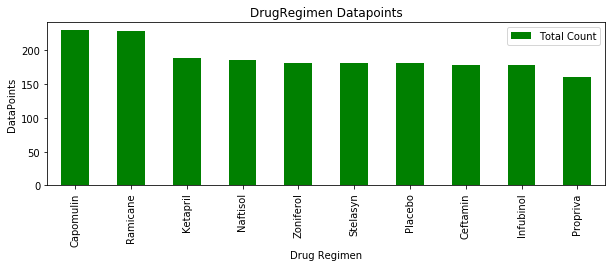

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
combined_data["Drug Regimen"].value_counts()
DRUG_REGIMEN_df=combined_data["Drug Regimen"].value_counts().rename_axis('Drug Regimen').reset_index(name='Total Count')
NEW_DRUG_REGIMEN_df=DRUG_REGIMEN_df.set_index("Drug Regimen")
NEW_DRUG_REGIMEN_df
NEW_DRUG_REGIMEN_df.plot(kind="bar", figsize=(10,3), color='g')
plt.title("DrugRegimen Datapoints")
plt.ylabel('DataPoints')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

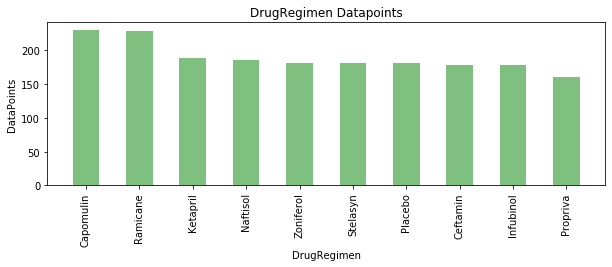

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,3))
x_axis=DRUG_REGIMEN_df["Drug Regimen"]
y_axis = DRUG_REGIMEN_df["Total Count"]
plt.title("DrugRegimen Datapoints")
plt.xlabel("DrugRegimen")
plt.ylabel("DataPoints")
plt.bar(x_axis, y_axis, width=0.5,color='g', alpha=0.5, align="center")
plt.xticks(rotation='vertical')

## Pie plots

C:\Users\write\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


Text(0, 0.5, '')

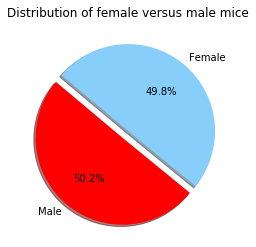

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_metadata
Mouse_Sex_df=mouse_metadata["Sex"].value_counts().rename_axis('Sex').reset_index(name='Total Count')
New_Mouse_Sex_df=Mouse_Sex_df.set_index("Sex")
New_Mouse_Sex_df

# The colors of each section of the pie chart
colors = ["red", "lightskyblue"]

# Tells matplotlib to seperate the "Male vs Female" section from the others
explode = (0.1, 0)

ax=New_Mouse_Sex_df.plot(kind='pie', explode=explode, colors=colors, autopct='%1.1f%%',fontsize=10,subplots=True,shadow=True, startangle=140,legend=False )
plt.title("Distribution of female versus male mice")
plt.axes().set_ylabel('')

Text(0.5, 1.0, 'Distribution of female versus male mice')

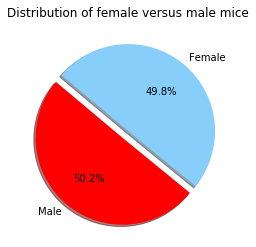

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = Mouse_Sex_df["Sex"]
# The values of each section of the pie chart
sizes = Mouse_Sex_df["Total Count"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of female versus male mice")

## Quartiles, outliers and boxplots

In [7]:
mouse_metadata
study_results
# Group by Mouse ID and Drug Regimen to get to the Final Tumor Volume or each mouse
groupby_MouseID_df = combined_data.groupby(["Mouse ID","Drug Regimen"])
groupby_MouseID_df.count()
Final_Tumor_Volume_df=groupby_MouseID_df["Timepoint"].max().reset_index(name='Timepoint')
Final_Tumor_Volume_df.head(30)
# Merging the Final Tumor value with Drug Regimen
merge_df=pd.merge(Final_Tumor_Volume_df,study_results, on=["Mouse ID","Timepoint"])
merge_df.rename(columns = {'Tumor Volume (mm3)':'Final Tumor Volume'}, inplace = True)
merge_df

,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume,Metastatic Sites
0,a203,Infubinol,45,67.973419,2
1,a251,Infubinol,45,65.525743,1
2,a262,Placebo,45,70.717621,4
3,a275,Ceftamin,45,62.999356,3
4,a366,Stelasyn,30,63.440686,1
...,...,...,...,...,...
244,z435,Propriva,10,48.710661,0
245,z578,Ramicane,45,30.638696,0
246,z581,Infubinol,45,62.754451,3
247,z795,Naftisol,45,65.741070,3


In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculating for Capomulin
Search_Str=['Capomulin']
Capomulin_df=merge_df[merge_df["Drug Regimen"].isin(Search_Str)]
Capomulin_df
Cap_quartiles = Capomulin_df["Final Tumor Volume"].quantile([.25,.5,.75])
Cap_quartiles
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq
print(f"The lower quartile of Capomulin tumor volume is: {Cap_lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {Cap_upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {Cap_iqr}")
print(f"The the median of Capomulin tumor volume is: {Cap_quartiles[0.5]} ")

Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)
print(f"Capomulin Values below {Cap_lower_bound} could be outliers.")
print(f"Capomulin Values above {Cap_upper_bound} could be outliers.")
is_Outliers=(Capomulin_df["Final Tumor Volume"] > Cap_upper_bound) | (Capomulin_df["Final Tumor Volume"] < Cap_lower_bound)
#final_Tumor_Volumes_Promising_Regimens_df.head(63)
print("--------------------------------")
print("Below are the Capomulin Outliers")
print("--------------------------------")
if(len(Capomulin_df[is_Outliers])== 0):
    print("No outlier data for Capomulin Drug Regimen Final Tumor Volumes ")
Capomulin_df[is_Outliers]

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 
Capomulin Values below 20.70456164999999 could be outliers.
Capomulin Values above 51.83201549 could be outliers.
--------------------------------
Below are the Capomulin Outliers
--------------------------------
No outlier data for Capomulin Drug Regimen Final Tumor Volumes 


,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume,Metastatic Sites


In [9]:
# Calculating for Ramicane
Search_Str=['Ramicane']
Ramicane_df=merge_df[merge_df["Drug Regimen"].isin(Search_Str)]
Ramicane_df
Ram_quartiles = Ramicane_df["Final Tumor Volume"].quantile([.25,.5,.75])
Ram_quartiles
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq
print(f"The lower quartile of Ramicane tumor volume is: {Ram_lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {Ram_upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {Ram_iqr}")
print(f"The the median of Ramicane tumor volume is: {Ram_quartiles[0.5]} ")

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)
print(f"Ramicane Values below {Ram_lower_bound} could be outliers.")
print(f"Ramicane Values above {Ram_upper_bound} could be outliers.")
is_Outliers=(Ramicane_df["Final Tumor Volume"] > Ram_upper_bound) | (Ramicane_df["Final Tumor Volume"] < Ram_lower_bound)
#final_Tumor_Volumes_Promising_Regimens_df.head(63)
print("-------------------------------")
print("Below are the Ramicane Outliers")
print("-------------------------------")
if(len(Ramicane_df[is_Outliers])== 0):
    print("No outlier data for Ramicane Drug Regimen Final Tumor Volumes ")
Ramicane_df[is_Outliers]

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Ramicane Values below 17.912664470000003 could be outliers.
Ramicane Values above 54.30681135 could be outliers.
-------------------------------
Below are the Ramicane Outliers
-------------------------------
No outlier data for Ramicane Drug Regimen Final Tumor Volumes 


,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume,Metastatic Sites


In [10]:
# Calculating for Infubinol
Search_Str=['Infubinol']
Infubinol_df=merge_df[merge_df["Drug Regimen"].isin(Search_Str)]
Infubinol_df
Inf_quartiles = Infubinol_df["Final Tumor Volume"].quantile([.25,.5,.75])
Inf_quartiles
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq
print(f"The lower quartile of Infubinol tumor volume is: {Inf_lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {Inf_upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {Inf_iqr}")
print(f"The the median of Infubinol tumor volume is: {Inf_quartiles[0.5]} ")

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)
print(f"Infubinol Values below {Inf_lower_bound} could be outliers.")
print(f"Infubinol Values above {Inf_upper_bound} could be outliers.")
is_Outliers=(Infubinol_df["Final Tumor Volume"] > Inf_upper_bound) | (Infubinol_df["Final Tumor Volume"] < Inf_lower_bound)
#final_Tumor_Volumes_Promising_Regimens_df.head(63)
print("--------------------------------")
print("Below are the Infubinol Outliers")
print("--------------------------------")
if(len(Infubinol_df[is_Outliers])== 0):
    print("No outlier data for Infubinol Drug Regimen Final Tumor Volumes ")
Infubinol_df[is_Outliers]

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046 
Infubinol Values below 36.83290494999999 could be outliers.
Infubinol Values above 82.74144559000001 could be outliers.
--------------------------------
Below are the Infubinol Outliers
--------------------------------


,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume,Metastatic Sites
31,c326,Infubinol,5,36.321346,0


In [11]:
#Calculating for Ceftamin
Search_Str=['Ceftamin']
Ceftamin_df=merge_df[merge_df["Drug Regimen"].isin(Search_Str)]
Ceftamin_df
Cef_quartiles = Ceftamin_df["Final Tumor Volume"].quantile([.25,.5,.75])
Cef_quartiles
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq
print(f"The lower quartile of Ceftamin tumor volume is: {Cef_lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {Cef_upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {Cef_iqr}")
print(f"The the median of Ceftamin tumor volume is: {Cef_quartiles[0.5]} ")

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)
print(f"Ceftamin Values below {Cef_lower_bound} could be outliers.")
print(f"Ceftamin Values above {Cef_upper_bound} could be outliers.")
is_Outliers=(Ceftamin_df["Final Tumor Volume"] > Cef_upper_bound) 
print("-------------------------------")
print("Below are the Ceftamin Outliers")
print("-------------------------------")
if(len(Ceftamin_df[is_Outliers])== 0):
    print("No outlier data for Ceftamin Drug Regimen Final Tumor Volumes ")
Ceftamin_df[is_Outliers]

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The the median of Ceftamin tumor volume is: 59.85195552 
Ceftamin Values below 25.355449580000002 could be outliers.
Ceftamin Values above 87.66645829999999 could be outliers.
-------------------------------
Below are the Ceftamin Outliers
-------------------------------
No outlier data for Ceftamin Drug Regimen Final Tumor Volumes 


,Mouse ID,Drug Regimen,Timepoint,Final Tumor Volume,Metastatic Sites


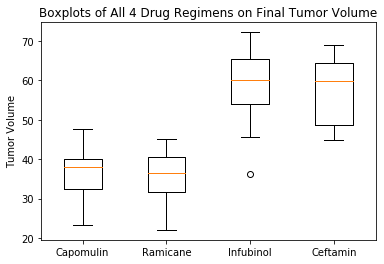

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Cap_data = Capomulin_df["Final Tumor Volume"]
Ram_data = Ramicane_df["Final Tumor Volume"]
Inf_data = Infubinol_df["Final Tumor Volume"]
Cef_data = Ceftamin_df["Final Tumor Volume"]
data = [Cap_data, Ram_data,Inf_data,Cef_data]
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplots of All 4 Drug Regimens on Final Tumor Volume')
ax1.set_ylabel('Tumor Volume')
controls=["Capomulin","Ramicane","Infubinol","Ceftamin"]
colors = ["pink", "lightblue", "lightgreen","red"]
ax1.boxplot(data,labels=controls)
plt.show()

## Line and scatter plots

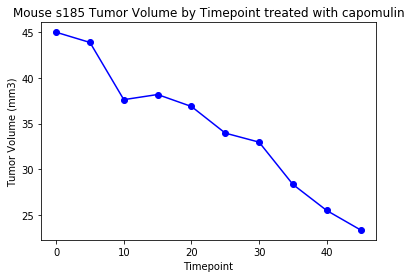

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Search_Str=['Capomulin']
Cap_data=combined_data[combined_data["Drug Regimen"].isin(Search_Str)]
Cap_data
Mouse_Str=['s185']
Mouse_data=Cap_data[Cap_data["Mouse ID"].isin(Mouse_Str)]
Mouse_data
x_axis=Mouse_data["Timepoint"]
x_axis
y_axis=Mouse_data["Tumor Volume (mm3)"]
y_axis
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title('Mouse s185 Tumor Volume by Timepoint treated with capomulin')
plt.plot(x_axis, y_axis, marker ='o', color='blue')
#plt.show()

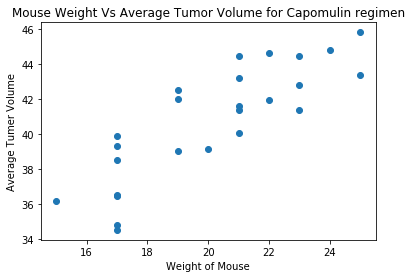

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

groupby_df=Cap_data.groupby(["Mouse ID","Weight (g)"])
groupby_df.count()
Avg_Tumor_Vol=groupby_df["Tumor Volume (mm3)"].mean().reset_index(name='Avg Tumer Volume')
Avg_Tumor_Vol.head(30)
x_values = Avg_Tumor_Vol['Weight (g)']
y_values = Avg_Tumor_Vol['Avg Tumer Volume']
plt.scatter(x_values,y_values)
plt.xlabel('Weight of Mouse')
plt.ylabel('Average Tumer Volume')
plt.title('Mouse Weight Vs Average Tumor Volume for Capomulin regimen')
plt.show()

The correlation between Mouse Weight and Avg Tumor Volume is 0.84
The r-value is: 0.8419363424694718
The r-squared is: 0.7088568047708717


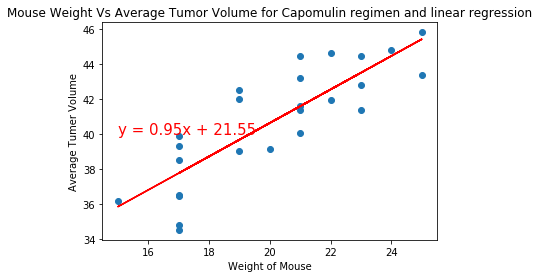

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between Mouse Weight and Avg Tumor Volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Weight of Mouse')
plt.ylabel('Average Tumer Volume')
plt.title('Mouse Weight Vs Average Tumor Volume for Capomulin regimen and linear regression')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()